In [1]:
from PortfolioOptimizer import *

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# 引入資料

## 初始化

In [2]:
start_date = '2010-01-01'
end_date = '2019-12-31'

code_list=[
    '0050.TW',
    '3008.TW',
    '2330.TW',
    '1216.TW',
    '1301.TW',
    '2002.TW',
    'MSFT',
    'AAPL',
]

In [3]:
df = Portfolio.get_price_table(code_list, start=start_date, end=end_date)


Finding  0050.TW
Finding  3008.TW
Finding  2330.TW
Finding  1216.TW
Finding  1301.TW
Finding  2002.TW
Finding  MSFT
Finding  AAPL


# 建立Portfolio物件

In [4]:
port=Portfolio(df)

# 相關性分析

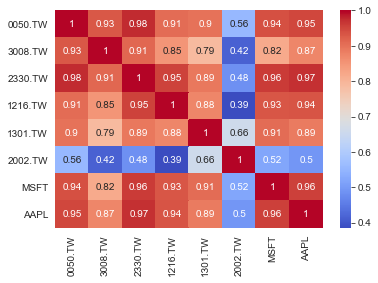

In [5]:
port.price_corr_map()

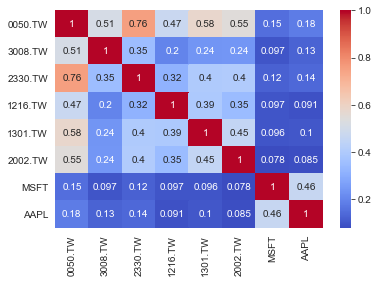

In [6]:
port.return_corr_map()

# Equal-Weight 投組分析

In [7]:
port.Summary()

                      Period                      
From 2010-01-04  to 2019-12-30, 3647 days.
------------------------------------------------------------
              Weights of Portfolio:               
------------------------------------------------------------
0050.TW                                 12.50%
3008.TW                                 12.50%
2330.TW                                 12.50%
1216.TW                                 12.50%
1301.TW                                 12.50%
2002.TW                                 12.50%
MSFT                                    12.50%
AAPL                                    12.50%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.160
Average Standard Deviation :                           0.147
Sharpe Ratio :                                  

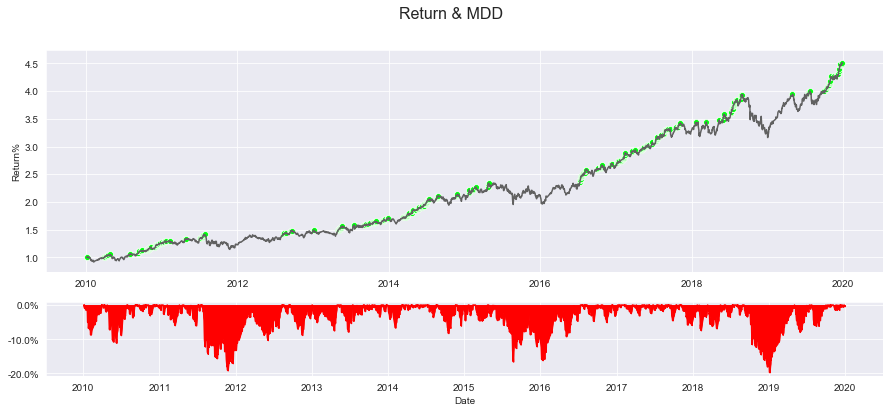

In [8]:
port.Return_Plot()

# 效率前緣

Begin :  2010-01-04 00:00:00
End :  2019-12-30 00:00:00
Rf :  0.05


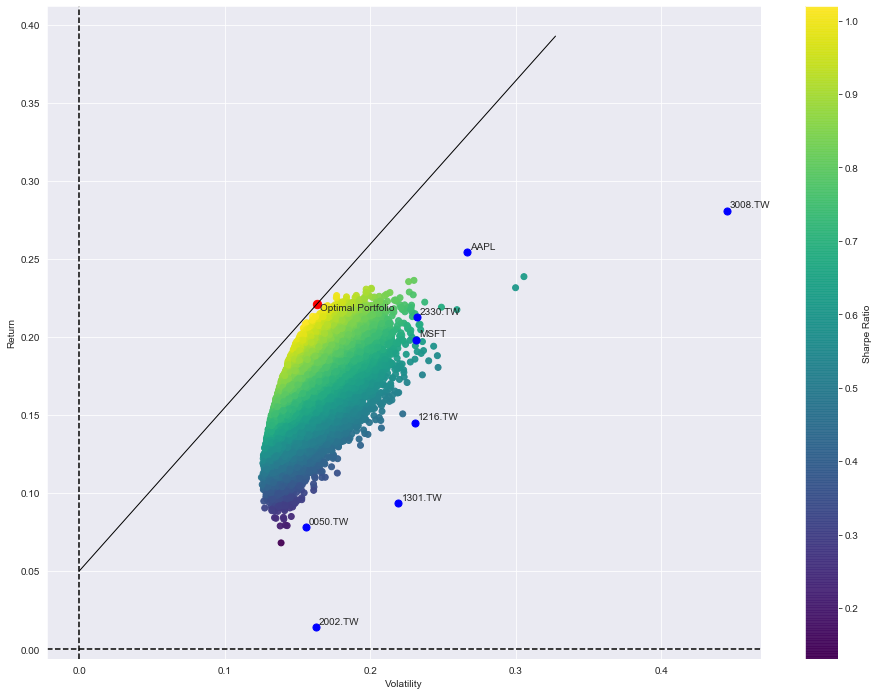

In [9]:
port.set_optimize()
port.optimize_set()
port.Plot_Effcient_Frontier()

### 可透過修改rf得到不同的切點投組

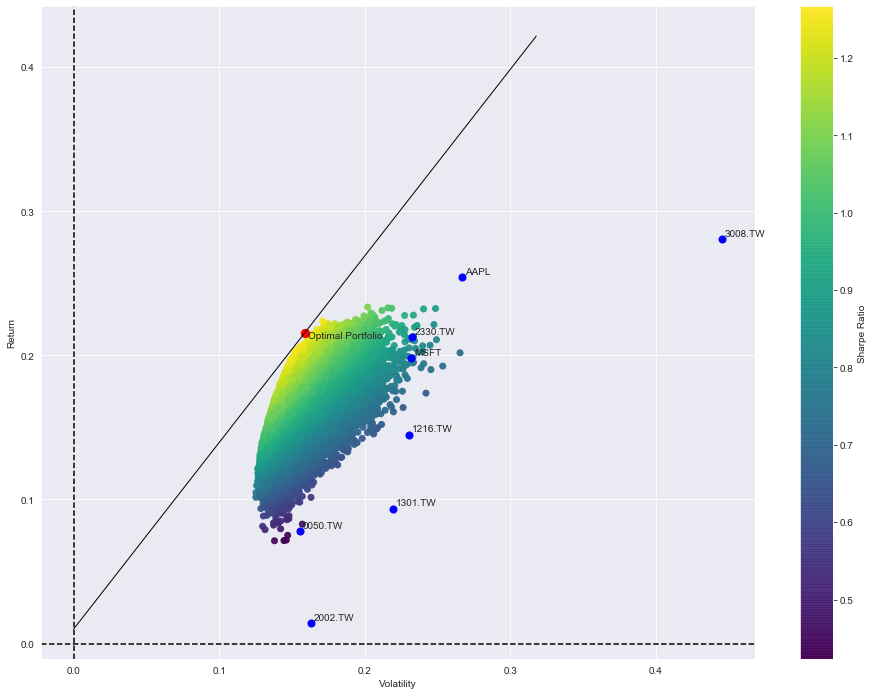

In [10]:
port.set_optimize(rf=0.01)
port.Plot_Effcient_Frontier()

# 權重最佳化求解

### Sharpe Ratio

In [11]:
port.Get_Best_Portfolio()

(1.2955087656897764,
 [0.0,
  0.06632579349232069,
  0.3027936593563748,
  0.13912617859708545,
  0.0,
  1.3082280301757855e-16,
  0.22160345135388962,
  0.2701509172003294])

In [12]:
port.set_weights(port.Get_Best_Portfolio()[1])

In [13]:
port.Summary()

                      Period                      
From 2010-01-04  to 2019-12-30, 3647 days.
------------------------------------------------------------
              Weights of Portfolio:               
------------------------------------------------------------
0050.TW                                  0.00%
3008.TW                                  6.63%
2330.TW                                 30.28%
1216.TW                                 13.91%
1301.TW                                  0.00%
2002.TW                                  0.00%
MSFT                                    22.16%
AAPL                                    27.02%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.216
Average Standard Deviation :                           0.159
Sharpe Ratio :                                  

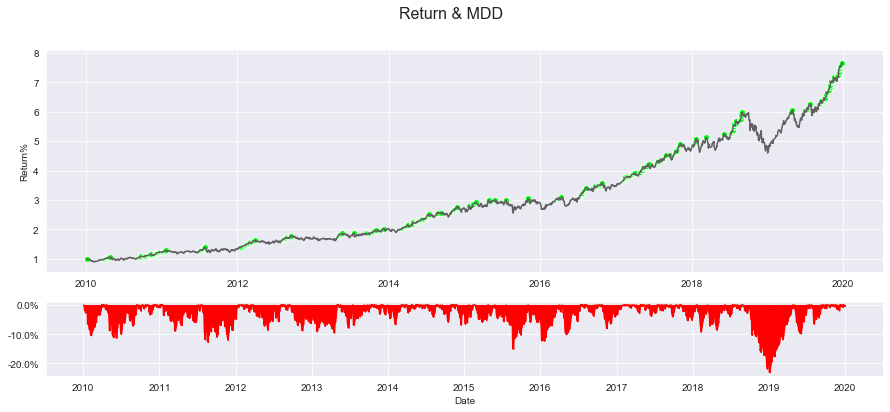

In [14]:
port.Return_Plot()

### MDD

In [15]:
port.set_weights(port.Get_Best_Portfolio(method='mdd')[1])
port.Summary()

                      Period                      
From 2010-01-04  to 2019-12-30, 3647 days.
------------------------------------------------------------
              Weights of Portfolio:               
------------------------------------------------------------
0050.TW                                  0.00%
3008.TW                                  0.00%
2330.TW                                  0.00%
1216.TW                                 28.46%
1301.TW                                  1.58%
2002.TW                                 50.54%
MSFT                                    19.42%
AAPL                                     0.00%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.088
Average Standard Deviation :                           0.136
Sharpe Ratio :                                  

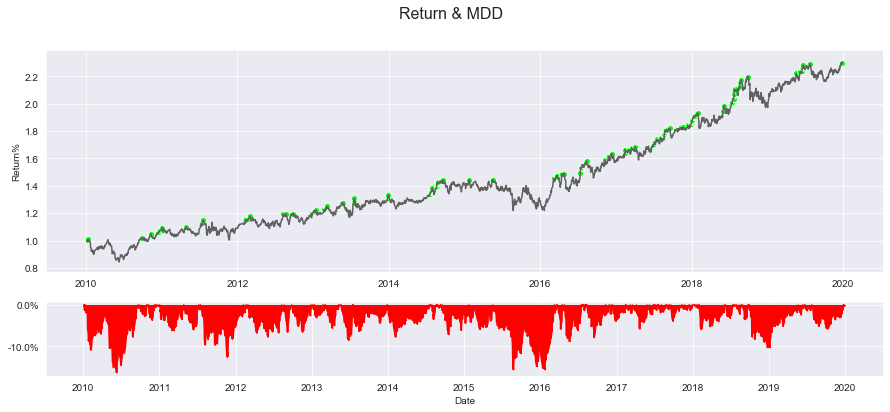

In [16]:
port.Return_Plot()

### Vol

In [17]:
port.set_weights(port.Get_Best_Portfolio(method='std')[1])
port.Summary()

                      Period                      
From 2010-01-04  to 2019-12-30, 3647 days.
------------------------------------------------------------
              Weights of Portfolio:               
------------------------------------------------------------
0050.TW                                 30.15%
3008.TW                                  0.00%
2330.TW                                  0.00%
1216.TW                                  7.58%
1301.TW                                  1.91%
2002.TW                                 33.82%
MSFT                                    18.02%
AAPL                                     8.51%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.098
Average Standard Deviation :                           0.124
Sharpe Ratio :                                  

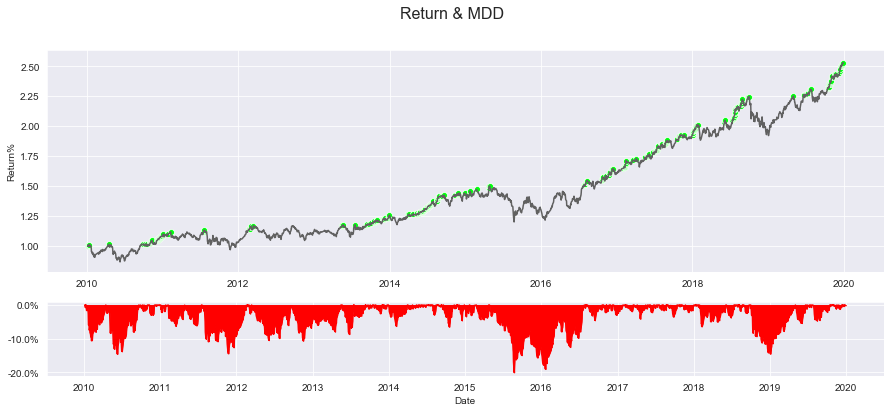

In [18]:
port.Return_Plot()

## Hedge(作業的Alpha策略)

In [19]:
port.set_weights(port.Get_Best_Portfolio(hedge=True)[1])
port.Summary()

                      Period                      
From 2010-01-04  to 2019-12-30, 3647 days.
------------------------------------------------------------
              Weights of Portfolio:               
------------------------------------------------------------
0050.TW                               -100.00%
3008.TW                                 15.41%
2330.TW                                 63.32%
1216.TW                                 21.81%
1301.TW                                 11.47%
2002.TW                                -44.06%
MSFT                                    11.02%
AAPL                                    21.03%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.211
Average Standard Deviation :                           0.148
Sharpe Ratio :                                  

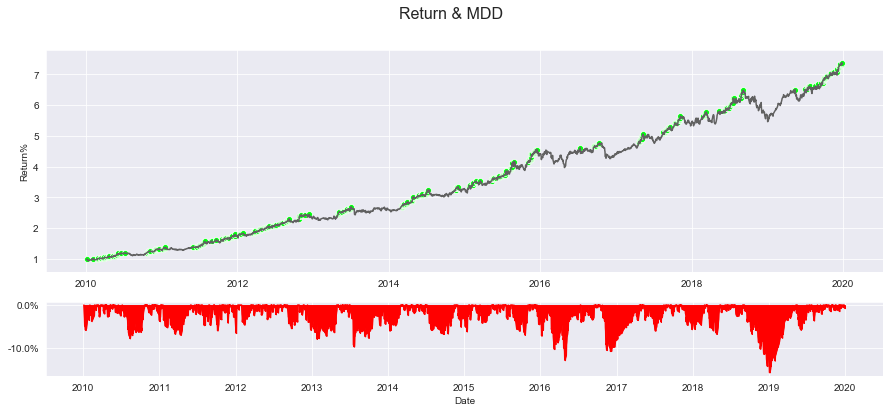

In [20]:
port.Return_Plot()

# 蒙地卡羅

Minimum :               67.182% 
5   Percentile :        122.582% 
25 Percentile :        154.134% 
Median :                  184.768% 
Mean :                     190.197% 
75 Percentile :        216.416% 
Maximum :             452.750% 


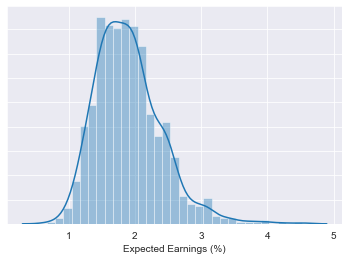

<Figure size 1152x576 with 0 Axes>

In [21]:
# port.Get_Monte_Carlo_Forecast(capital=1, path=1000, period=3, yearly=None)
port.Get_Monte_Carlo_Forecast()

Minimum :            844454.286 
5   Percentile :     1232967.939 
25 Percentile :     1539178.192 
Median :               1841977.276 
Mean :                  1912082.018 
75 Percentile :     2169131.742 
Maximum :          4617108.847 


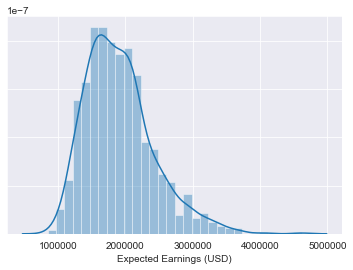

<Figure size 1152x576 with 0 Axes>

In [22]:
port.Get_Monte_Carlo_Forecast(capital=1000000)

# 滾動回測

透過前一期的報酬以及波動，形成最佳化權重後，投資下一期

### Positive

In [23]:
port.set_optimize()
port.Rolling_test(show=True)

                      Period                      
From 2010-12-31  to 2011-12-31, 365 days.
------------------------------------------------------------
              Weights of Portfolio:               
------------------------------------------------------------
0050.TW                                  0.00%
3008.TW                                 19.98%
2330.TW                                  0.00%
1216.TW                                  0.00%
1301.TW                                 51.00%
2002.TW                                  0.00%
MSFT                                     0.00%
AAPL                                    29.03%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                  -0.044
Average Standard Deviation :                           0.256
Sharpe Ratio :                                   

                      Period                      
From 2017-12-31  to 2018-12-31, 365 days.
------------------------------------------------------------
              Weights of Portfolio:               
------------------------------------------------------------
0050.TW                                  0.00%
3008.TW                                  0.00%
2330.TW                                 23.73%
1216.TW                                 14.10%
1301.TW                                  7.58%
2002.TW                                  0.00%
MSFT                                    33.27%
AAPL                                    21.33%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.078
Average Standard Deviation :                           0.190
Sharpe Ratio :                                   

2010-12-31    0.000283
2011-01-03    0.006083
2011-01-04    0.002903
2011-01-05   -0.005094
2011-01-06   -0.001285
                ...   
2019-12-23    0.004538
2019-12-24   -0.001806
2019-12-26    0.004714
2019-12-27    0.001054
2019-12-30   -0.004998
Length: 2133, dtype: float64

In [24]:
port.Backtest_Summary()

                      Period                      
From 2010-12-31  to 2019-12-30, 3286 days.
------------------------------------------------------------
           Latest Weights of Portfolio:           
------------------------------------------------------------
0050.TW                                  0.00%
3008.TW                                  0.00%
2330.TW                                  0.00%
1216.TW                                 42.26%
1301.TW                                  0.00%
2002.TW                                  0.00%
MSFT                                    57.74%
AAPL                                     0.00%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.159
Average Standard Deviation :                           0.187
Sharpe Ratio :                                  

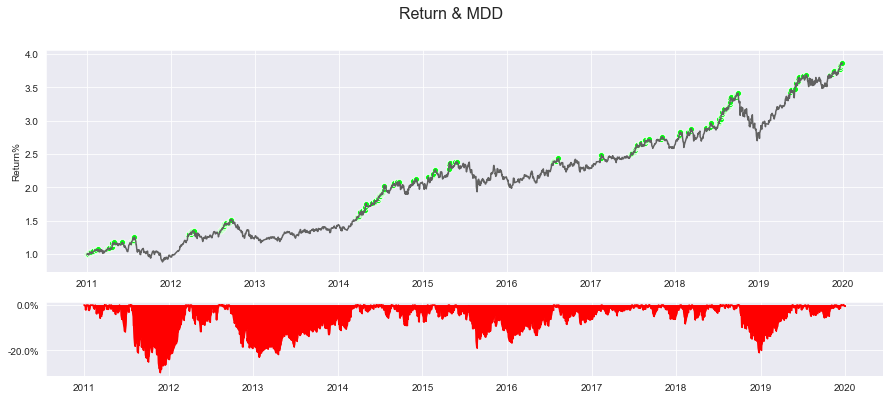

In [25]:
port.Return_Plot(backtest=True)

#### 使用累積資訊 (每一期計算最佳權重的資料都從頭開始計算)

In [26]:
port.set_optimize()
port.Rolling_test(show=True, cul_info=True)

                      Period                      
From 2010-12-31  to 2011-12-31, 365 days.
------------------------------------------------------------
              Weights of Portfolio:               
------------------------------------------------------------
0050.TW                                  0.00%
3008.TW                                 19.98%
2330.TW                                  0.00%
1216.TW                                  0.00%
1301.TW                                 51.00%
2002.TW                                  0.00%
MSFT                                     0.00%
AAPL                                    29.03%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                  -0.044
Average Standard Deviation :                           0.256
Sharpe Ratio :                                   

                      Period                      
From 2017-12-31  to 2018-12-31, 365 days.
------------------------------------------------------------
              Weights of Portfolio:               
------------------------------------------------------------
0050.TW                                  0.00%
3008.TW                                 13.72%
2330.TW                                 29.80%
1216.TW                                 11.02%
1301.TW                                  0.00%
2002.TW                                  0.00%
MSFT                                    11.47%
AAPL                                    33.99%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                  -0.011
Average Standard Deviation :                           0.215
Sharpe Ratio :                                   

2010-12-31    0.000283
2011-01-03    0.006083
2011-01-04    0.002903
2011-01-05   -0.005094
2011-01-06   -0.001285
                ...   
2019-12-23    0.007337
2019-12-24   -0.002109
2019-12-26    0.009212
2019-12-27    0.005555
2019-12-30   -0.003488
Length: 2133, dtype: float64

In [27]:
port.Backtest_Summary()

                      Period                      
From 2010-12-31  to 2019-12-30, 3286 days.
------------------------------------------------------------
           Latest Weights of Portfolio:           
------------------------------------------------------------
0050.TW                                  0.00%
3008.TW                                  9.74%
2330.TW                                 28.51%
1216.TW                                 15.62%
1301.TW                                  0.00%
2002.TW                                  0.00%
MSFT                                    18.28%
AAPL                                    27.86%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.182
Average Standard Deviation :                           0.191
Sharpe Ratio :                                  

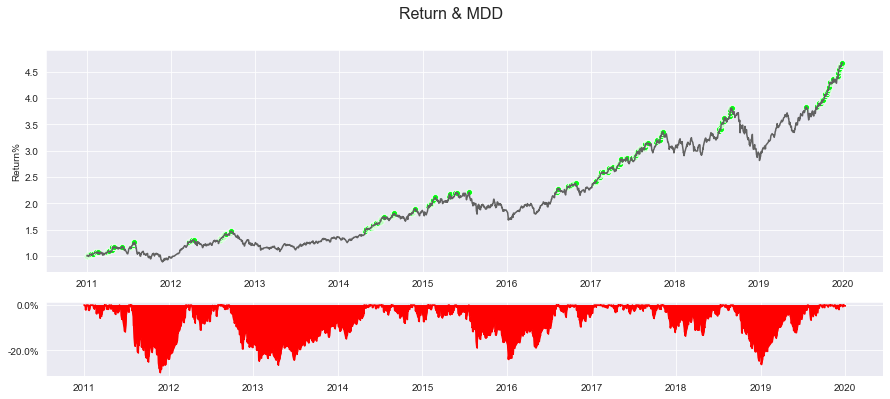

In [28]:
port.Return_Plot(backtest=True)

### Neutral

In [29]:
port.set_optimize()
port.Rolling_test(hedge=True)

2010-12-31   -0.018523
2011-01-03    0.002839
2011-01-04    0.010368
2011-01-05    0.011484
2011-01-06   -0.024774
                ...   
2019-12-23   -0.000411
2019-12-24   -0.007307
2019-12-26   -0.012000
2019-12-27    0.004847
2019-12-30   -0.017976
Length: 2133, dtype: float64

In [30]:
port.Backtest_Summary()

                      Period                      
From 2010-12-31  to 2019-12-30, 3286 days.
------------------------------------------------------------
           Latest Weights of Portfolio:           
------------------------------------------------------------
0050.TW                               -100.00%
3008.TW                                -11.77%
2330.TW                                 47.43%
1216.TW                                 47.45%
1301.TW                                 40.05%
2002.TW                                -34.75%
MSFT                                    77.99%
AAPL                                   -66.40%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.112
Average Standard Deviation :                           0.313
Sharpe Ratio :                                  

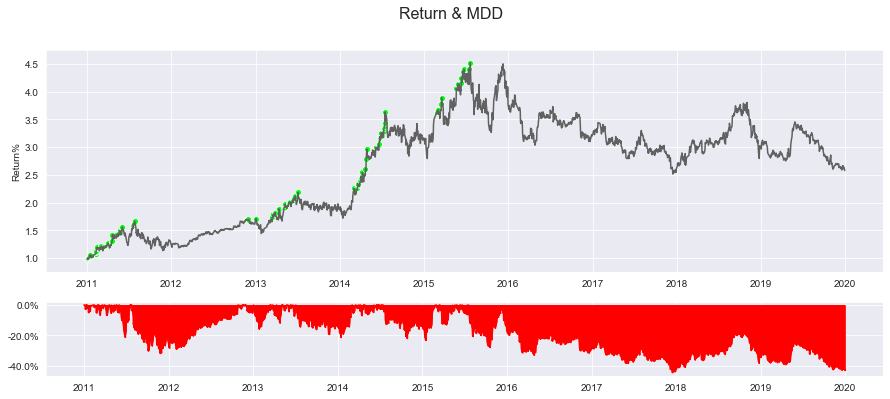

In [31]:
port.Return_Plot(backtest=True)

#### 累積資料

In [32]:
port.set_optimize()
port.Rolling_test(hedge=True, cul_info=True)
port.Backtest_Summary()

                      Period                      
From 2010-12-31  to 2019-12-30, 3286 days.
------------------------------------------------------------
           Latest Weights of Portfolio:           
------------------------------------------------------------
0050.TW                               -100.00%
3008.TW                                 22.80%
2330.TW                                 79.55%
1216.TW                                 36.11%
1301.TW                                 16.42%
2002.TW                                -97.22%
MSFT                                    13.28%
AAPL                                    29.06%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.198
Average Standard Deviation :                           0.250
Sharpe Ratio :                                  

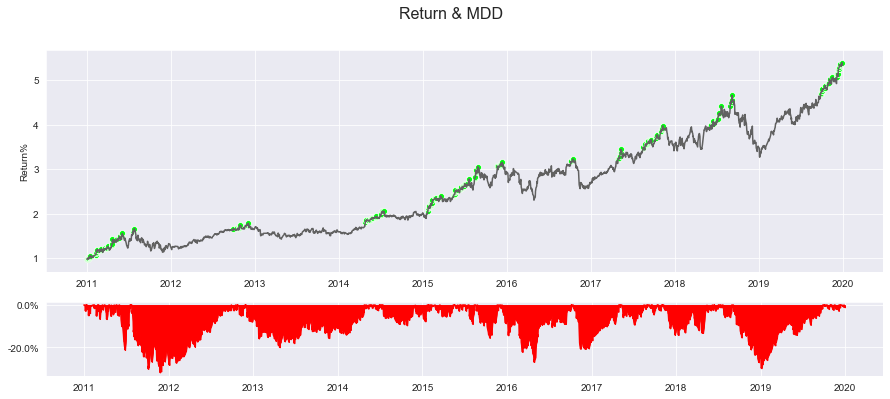

In [33]:
port.Return_Plot(backtest=True)

## 改變換倉頻率

#### 3個月

In [34]:
port.set_optimize()
port.Rolling_test(show=True, freq='3m')

                      Period                      
From 2010-01-31  to 2010-04-30, 89 days.
------------------------------------------------------------
              Weights of Portfolio:               
------------------------------------------------------------
0050.TW                                  0.00%
3008.TW                                100.00%
2330.TW                                  0.00%
1216.TW                                  0.00%
1301.TW                                  0.00%
2002.TW                                  0.00%
MSFT                                     0.00%
AAPL                                     0.00%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.993
Average Standard Deviation :                           0.287
Sharpe Ratio :                                    

                      Period                      
From 2011-10-31  to 2012-01-31, 92 days.
------------------------------------------------------------
              Weights of Portfolio:               
------------------------------------------------------------
0050.TW                                  0.00%
3008.TW                                  0.00%
2330.TW                                 30.52%
1216.TW                                  0.00%
1301.TW                                  0.00%
2002.TW                                  0.00%
MSFT                                     0.00%
AAPL                                    69.48%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.472
Average Standard Deviation :                           0.212
Sharpe Ratio :                                    

                      Period                      
From 2013-07-31  to 2013-10-31, 92 days.
------------------------------------------------------------
              Weights of Portfolio:               
------------------------------------------------------------
0050.TW                                  0.00%
3008.TW                                 25.67%
2330.TW                                  0.00%
1216.TW                                 13.94%
1301.TW                                 36.21%
2002.TW                                  0.00%
MSFT                                     0.00%
AAPL                                    24.18%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.140
Average Standard Deviation :                           0.181
Sharpe Ratio :                                    

                      Period                      
From 2015-04-30  to 2015-07-31, 92 days.
------------------------------------------------------------
              Weights of Portfolio:               
------------------------------------------------------------
0050.TW                                 14.31%
3008.TW                                 30.53%
2330.TW                                  0.00%
1216.TW                                  0.00%
1301.TW                                  0.00%
2002.TW                                  0.00%
MSFT                                    55.15%
AAPL                                     0.00%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                  -0.109
Average Standard Deviation :                           0.190
Sharpe Ratio :                                    

                      Period                      
From 2017-01-31  to 2017-04-30, 89 days.
------------------------------------------------------------
              Weights of Portfolio:               
------------------------------------------------------------
0050.TW                                  0.00%
3008.TW                                 13.49%
2330.TW                                  0.00%
1216.TW                                  0.00%
1301.TW                                  0.29%
2002.TW                                 37.63%
MSFT                                    26.49%
AAPL                                    22.10%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.277
Average Standard Deviation :                           0.102
Sharpe Ratio :                                    

                      Period                      
From 2019-01-31  to 2019-04-30, 89 days.
------------------------------------------------------------
              Weights of Portfolio:               
------------------------------------------------------------
0050.TW                                  0.00%
3008.TW                                 11.56%
2330.TW                                  0.00%
1216.TW                                  0.00%
1301.TW                                  0.00%
2002.TW                                 86.33%
MSFT                                     2.10%
AAPL                                     0.00%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.055
Average Standard Deviation :                           0.095
Sharpe Ratio :                                    

2010-02-01   -0.023045
2010-02-02    0.013407
2010-02-03    0.030992
2010-02-04    0.009346
2010-02-05   -0.040338
                ...   
2019-12-23    0.015389
2019-12-24   -0.003769
2019-12-26    0.008355
2019-12-27    0.009999
2019-12-30   -0.005169
Length: 2356, dtype: float64

In [35]:
port.Backtest_Summary()

                      Period                      
From 2010-02-01  to 2019-12-30, 3619 days.
------------------------------------------------------------
           Latest Weights of Portfolio:           
------------------------------------------------------------
0050.TW                                  0.00%
3008.TW                                  0.10%
2330.TW                                 67.83%
1216.TW                                  0.00%
1301.TW                                  0.00%
2002.TW                                  0.00%
MSFT                                     0.00%
AAPL                                    32.07%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.213
Average Standard Deviation :                           0.205
Sharpe Ratio :                                  

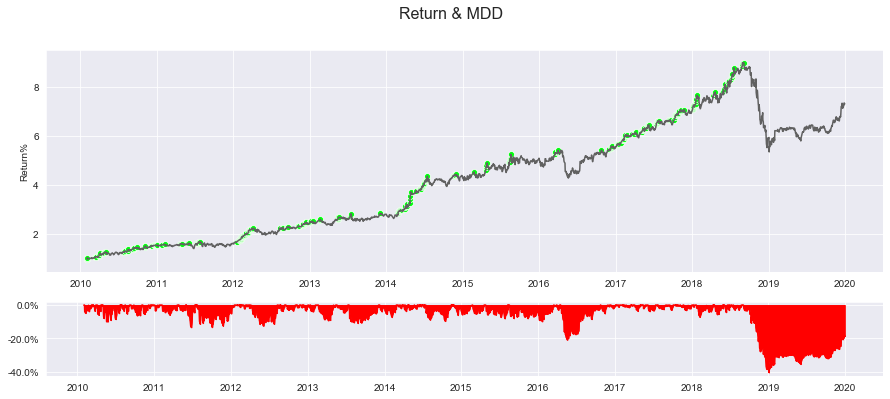

In [36]:
port.Return_Plot(backtest=True)

3個月加上累積資料

In [37]:
port.set_optimize()
port.Rolling_test(freq='3m', cul_info=True)
port.Backtest_Summary()

                      Period                      
From 2010-02-01  to 2019-12-30, 3619 days.
------------------------------------------------------------
           Latest Weights of Portfolio:           
------------------------------------------------------------
0050.TW                                  0.00%
3008.TW                                  8.50%
2330.TW                                 29.81%
1216.TW                                 12.22%
1301.TW                                  0.00%
2002.TW                                  0.00%
MSFT                                    20.51%
AAPL                                    28.97%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.212
Average Standard Deviation :                           0.202
Sharpe Ratio :                                  

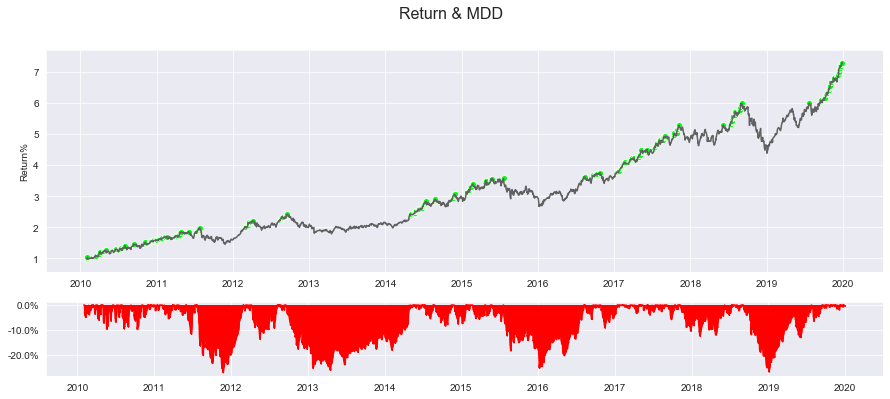

In [38]:
port.Return_Plot(backtest=True)

#### 半年

In [39]:
port.set_optimize()
port.Rolling_test(freq='6m')
port.Backtest_Summary()

                      Period                      
From 2010-02-01  to 2019-12-30, 3619 days.
------------------------------------------------------------
           Latest Weights of Portfolio:           
------------------------------------------------------------
0050.TW                                  0.00%
3008.TW                                  0.00%
2330.TW                                 16.10%
1216.TW                                 31.02%
1301.TW                                  0.00%
2002.TW                                  0.00%
MSFT                                    35.84%
AAPL                                    17.04%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.185
Average Standard Deviation :                           0.203
Sharpe Ratio :                                  

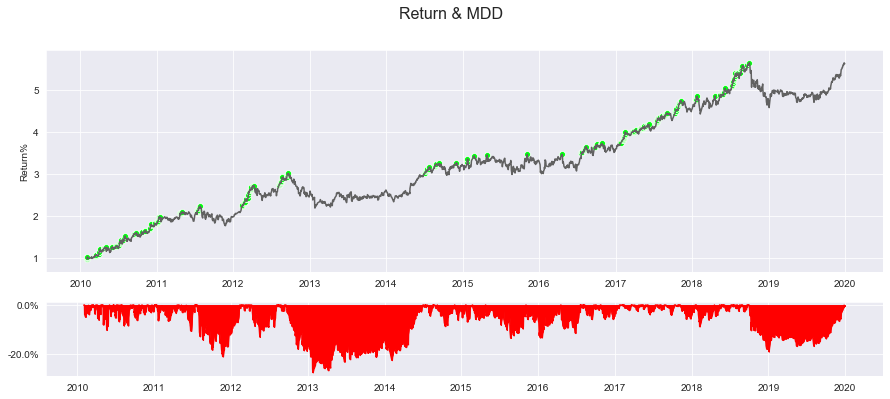

In [40]:
port.Return_Plot(backtest=True)

#### 半年加上累積資訊

In [41]:
port.set_optimize()
port.Rolling_test(freq='6m', cul_info=True)
port.Backtest_Summary()

                      Period                      
From 2010-02-01  to 2019-12-30, 3619 days.
------------------------------------------------------------
           Latest Weights of Portfolio:           
------------------------------------------------------------
0050.TW                                  0.00%
3008.TW                                  9.10%
2330.TW                                 25.51%
1216.TW                                 16.12%
1301.TW                                  0.00%
2002.TW                                  0.00%
MSFT                                    22.48%
AAPL                                    26.78%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.223
Average Standard Deviation :                           0.212
Sharpe Ratio :                                  

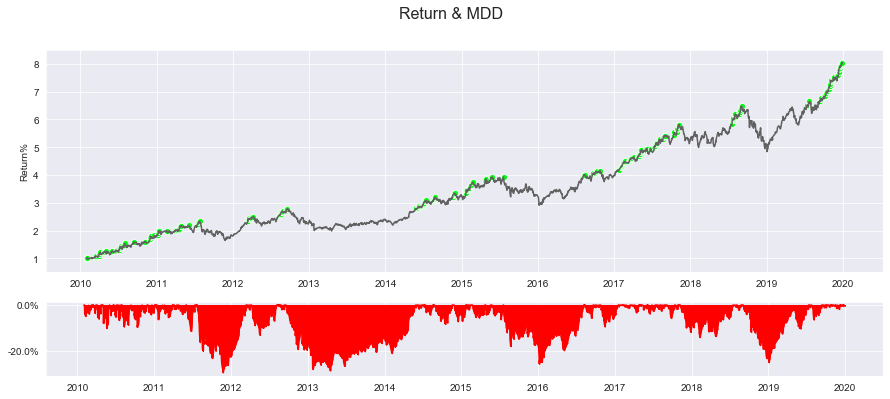

In [42]:
port.Return_Plot(backtest=True)

## Hedge加上累積資料

In [43]:
port.set_optimize()
port.Rolling_test(freq='6m', cul_info=True, hedge=True)
port.Backtest_Summary()

                      Period                      
From 2010-02-01  to 2019-12-30, 3619 days.
------------------------------------------------------------
           Latest Weights of Portfolio:           
------------------------------------------------------------
0050.TW                               -100.00%
3008.TW                                 23.24%
2330.TW                                 78.91%
1216.TW                                 37.86%
1301.TW                                 10.66%
2002.TW                               -100.00%
MSFT                                    19.01%
AAPL                                    30.31%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.270
Average Standard Deviation :                           0.265
Sharpe Ratio :                                  

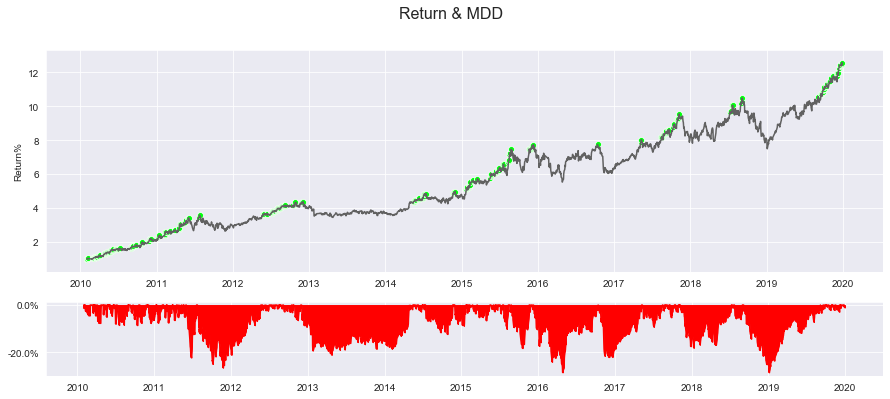

In [44]:
port.Return_Plot(backtest=True)

### 3個月Hedge加上累積資料

In [45]:
port.set_optimize()
port.Rolling_test(freq='3m', cul_info=True, hedge=True)
port.Backtest_Summary()

                      Period                      
From 2010-02-01  to 2019-12-30, 3619 days.
------------------------------------------------------------
           Latest Weights of Portfolio:           
------------------------------------------------------------
0050.TW                               -100.00%
3008.TW                                 22.67%
2330.TW                                 86.15%
1216.TW                                 33.86%
1301.TW                                  6.67%
2002.TW                               -100.00%
MSFT                                    16.51%
AAPL                                    34.15%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.266
Average Standard Deviation :                           0.261
Sharpe Ratio :                                  

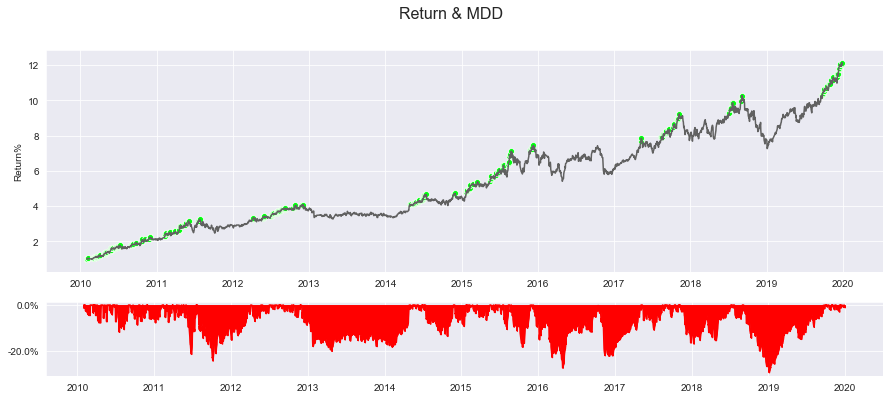

In [46]:
port.Return_Plot(backtest=True)

# 發現與心得

1. 真實使用上，Markowitz模型需要比較長的資料來做基礎，所以累積資料的穩健度跟獲利性基本上屌打滾動資料
2. 從半年與三個月的Hedge來看，其實到後來做多與放空的比例都差不多，所以時間一長的話，模型權重趨於固定，因此對於市場突然的大波動反應不夠
3. 即使三個月換一次的Hedge還是太長了，實務上運用會有很多的衍生成本

# 檢討與改進

個人認為未來還可以朝以下方向改進:

1. 此模型只有透過純粹的價格資料，可以引入交易量、財報等資料做更宏觀的判斷
2. 由於Markowitz模型本身的限制，權重變動劇烈，實作困難，如果有適合的主觀矩陣生成方法，未來也可以考慮使用Black-Litterman Model來做改進
3. 在前期的選擇Stock Pool也很重要，未來也可以朝著這個地方的改良下手